<P> <B> <font color=red size="6"> KNN Regression </Font></B> </P>

<b>KNN Regression:</b>

    In KNN regression, the prediction for a data point is the average of the target values of its kk-nearest neighbors.
    The neighbors are identified based on a distance metric, typically Euclidean distance.

<b>When to Use KNN Regression?</b>

   <b> Advantages: </b>
  <ol>    <li>Simple to implement.</li>
        <li>Non-parametric: Makes no assumptions about the data distribution.</li>
        <li>Effective for smaller datasets with low-dimensional data.</li></ol>  

   <b> Limitations: </b>
    <ol>    <li>Computationally expensive for large datasets due to the distance calculation.</li>
        <li>Performance can degrade with high-dimensional data due to the "curse of dimensionality."</li>
       <li> Sensitive to the choice of kk and scaling of features.</li></ol>

KNN Regression is best for:

    Small to medium-sized datasets.
    Problems where relationships are non-linear and no strong assumptions can be made.
    When interpretability and ease of implementation are desired.

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (classification categories: 0, 1, 2)

In [4]:

# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]  # Adding a continuous component for regression

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)


<b>Parameter k:</b>

 <ol>   <li>k determines the number of neighbors to consider.</li>
    <li>Larger k: Smoother predictions, but potentially less accurate for local patterns.</li>
   <li> Smaller k: More sensitive to local patterns but prone to noise.</li></ol>
<b>Weights:</b>

   <ol> <li>weights='uniform': All neighbors are weighted equally.</li>
    <li>weights='distance': Closer neighbors are given higher weight.</li></ol>

In [6]:
# Initialize and fit KNN Regressor
k = 5  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k, weights='uniform')  # 'uniform' weights mean equal weighting
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [7]:
# Make predictions
y_pred_train = knn_regressor.predict(X_train)
y_pred_test = knn_regressor.predict(X_test)

In [8]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")

Training Mean Squared Error: 0.2030
Testing Mean Squared Error: 0.3016
Training R^2 Score: 0.6407
Testing R^2 Score: 0.4439


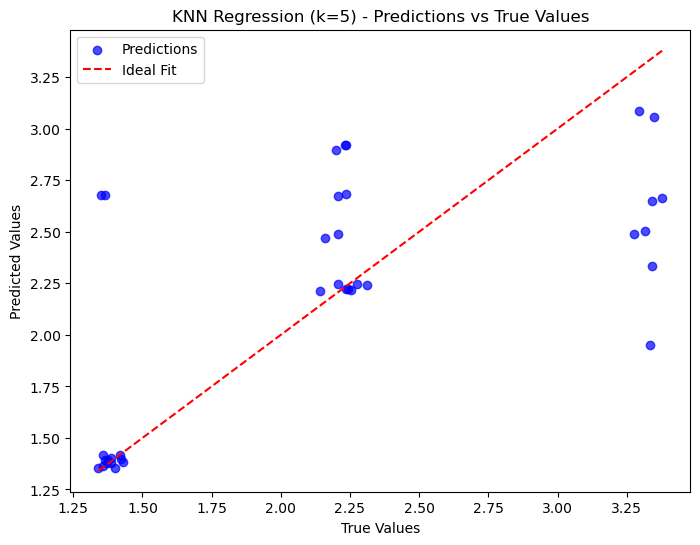

In [9]:
# Visualize predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'KNN Regression (k={k}) - Predictions vs True Values')
plt.legend()
plt.show()